# Problem Statement

Airbnb Inc is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences. Airbnb has close to 150 million customers across the world. Price is the most important factor considered by the customer while making booking into a property. Strategic pricing of the properties is important to avoid losing customers to the competitors.  
  
We have a data of 74111 Airbnb properties across the nations. Based on this data build a simple and multiple linear regression model to predict the strategic pricing of a new listed property on Airbnb.


# Import Libraries

In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
sns.set_theme(style='white')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt   
import warnings
warnings.filterwarnings('ignore')

# Load the data

In [2]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("AirBNB.csv")  

# EDA

In [3]:
# Check top few records to get a feel of the data structure
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [4]:
df.shape

(74111, 11)

In [5]:
# drop the id column as it doesnt help in prediction
df = df.drop('id', axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74106 non-null  object 
 1   accommodates          74108 non-null  float64
 2   bathrooms             73908 non-null  float64
 3   cancellation_policy   74103 non-null  object 
 4   cleaning_fee          74107 non-null  object 
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74019 non-null  float64
 8   beds                  73980 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: float64(6), object(4)
memory usage: 5.7+ MB


In [7]:
df.describe().round(0)

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price
count,74108.0,73908.0,57389.0,74019.0,73980.0,74111.0
mean,3.0,1.0,94.0,1.0,2.0,5.0
std,2.0,1.0,8.0,1.0,1.0,1.0
min,1.0,0.0,20.0,0.0,0.0,0.0
25%,2.0,1.0,92.0,1.0,1.0,4.0
50%,2.0,1.0,96.0,1.0,1.0,5.0
75%,4.0,1.0,100.0,1.0,2.0,5.0
max,16.0,8.0,100.0,10.0,18.0,8.0


## Univariate Analysis categorical variables

In [8]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

ROOM_TYPE :  3
Shared room         2163
Private room       30635
Entire home/apt    41308
Name: room_type, dtype: int64


CANCELLATION_POLICY :  3
moderate    19060
flexible    22543
strict      32500
Name: cancellation_policy, dtype: int64


CLEANING_FEE :  2
False    19708
True     54399
Name: cleaning_fee, dtype: int64


INSTANT_BOOKABLE :  2
t    19451
f    54660
Name: instant_bookable, dtype: int64




## Converting Instant_bookable from 'f' and 't' to boolean

In [9]:
df.instant_bookable.replace(['f','t'],[False,True],inplace=True ) # no, yes

## Converting categorical to dummy variables

In [10]:
df = pd.get_dummies(df, columns=['room_type','cancellation_policy','cleaning_fee'],drop_first=True)

In [11]:
df.head()

,accommodates,bathrooms,instant_bookable,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True
0,3.0,1.0,False,100.0,1.0,1.0,5.010635,0,0,0,1,1
1,7.0,1.0,True,93.0,3.0,3.0,5.129899,0,0,0,1,1
2,5.0,1.0,True,92.0,1.0,3.0,4.976734,0,0,1,0,1
3,4.0,1.0,False,NaN,2.0,2.0,6.620073,0,0,0,0,1
4,2.0,1.0,True,40.0,0.0,1.0,4.744932,0,0,1,0,1


## Check for Missing Values

In [12]:
# Are there any missing values ?
pd.DataFrame(df.isnull().sum(), columns=['Missing'], index = df.columns)

,Missing
accommodates,3
bathrooms,203
instant_bookable,0
review_scores_rating,16722
bedrooms,92
beds,131
log_price,0
room_type_Private room,0
room_type_Shared room,0
cancellation_policy_moderate,0


## Imputing missing values

In [13]:
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)    
        
pd.DataFrame(df.isnull().sum(), 
             columns=["Missing"], index = df.columns)       

,Missing
accommodates,0
bathrooms,0
instant_bookable,0
review_scores_rating,0
bedrooms,0
beds,0
log_price,0
room_type_Private room,0
room_type_Shared room,0
cancellation_policy_moderate,0


In [14]:
df.dtypes

accommodates                    float64
bathrooms                       float64
instant_bookable                   bool
review_scores_rating            float64
bedrooms                        float64
beds                            float64
log_price                       float64
room_type_Private room            uint8
room_type_Shared room             uint8
cancellation_policy_moderate      uint8
cancellation_policy_strict        uint8
cleaning_fee_True                 uint8
dtype: object

## Checking for Duplicate observations

In [15]:
df.duplicated().sum()

19998

In [16]:
print(f'Shape before deleting duplicates{df.shape}')
df.drop_duplicates(inplace=True)
print(f'Shape after deleting duplicates{df.shape}')

Shape before deleting duplicates(74111, 12)
Shape after deleting duplicates(54113, 12)


## Correlation Plot

In [17]:
# creating a list of column names that are 'actually' numeric & exclude one hot encoded categorical vars
numcols = ['accommodates','bathrooms','review_scores_rating','bedrooms','beds','log_price']

In [18]:
# create a mask to hide the upper triangle of correlation matrix heatmap
mask = np.triu(np.ones_like(df[numcols].corr(),dtype='bool'))
mask

array([[ True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True],
       [False, False, False, False,  True,  True],
       [False, False, False, False, False,  True]])

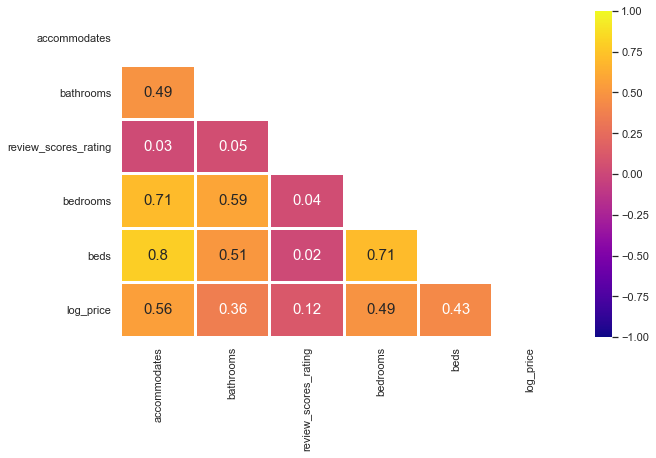

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numcols].corr().round(2),
            annot=True,
            linewidths=2,
            cmap='plasma',
            vmin=-1,
            vmax=1, 
            annot_kws={'size':15},
            mask=mask
           );

**The variable 'Accommodates', 'bedrooms','bathrooms', 'beds' are having correlation with each other.**


## Outlier Checks

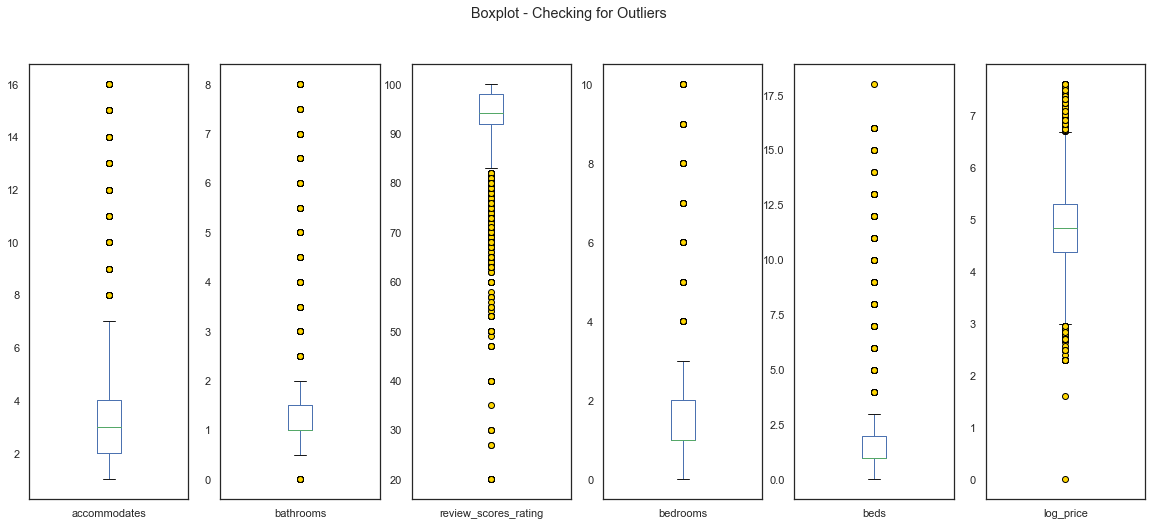

In [20]:
df[numcols].plot(kind = 'box',
                figsize=(20,8),
                subplots=True,
                title='Boxplot - Checking for Outliers');

In [21]:
def outlier_limits(col):
    """
    returns the upper and lower range of values beyond which the observations are treated as outliers.
    """
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [22]:
for column in df[numcols].columns:
    lr,ur=outlier_limits(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

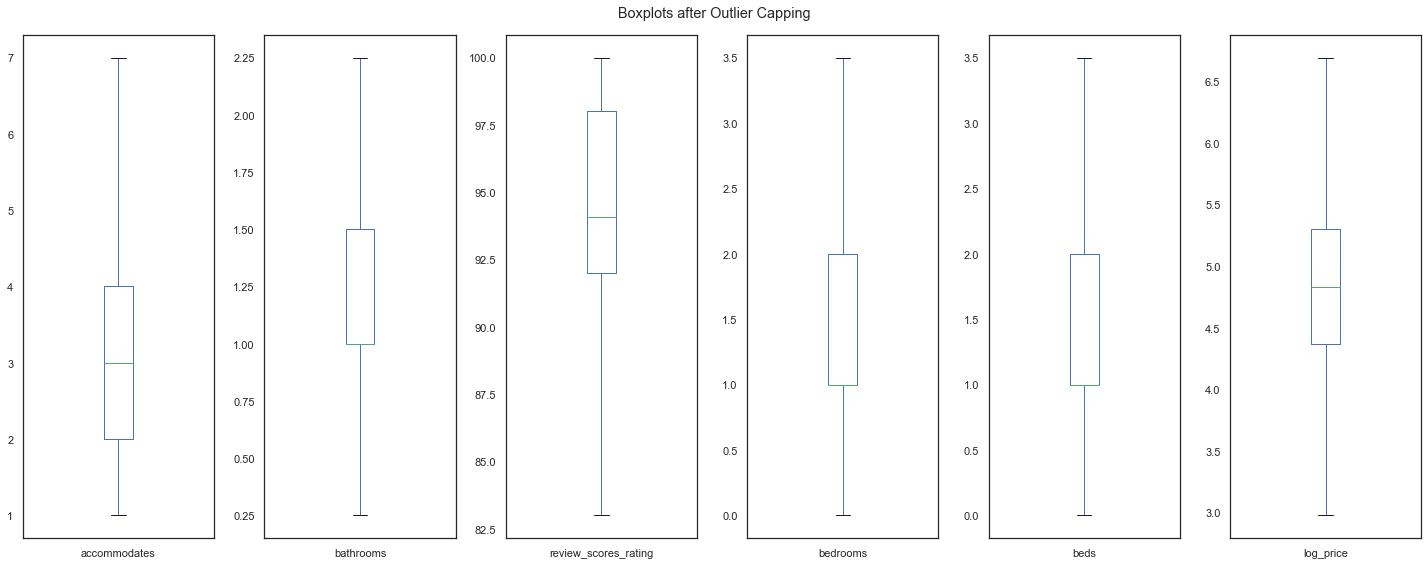

In [23]:
# Check if outliers have been capped

df[numcols].plot(kind = 'box', 
              title = 'Boxplots after Outlier Capping',
             figsize = (20,8),
             subplots = True)
plt.tight_layout();

## Bi-Variate Analysis

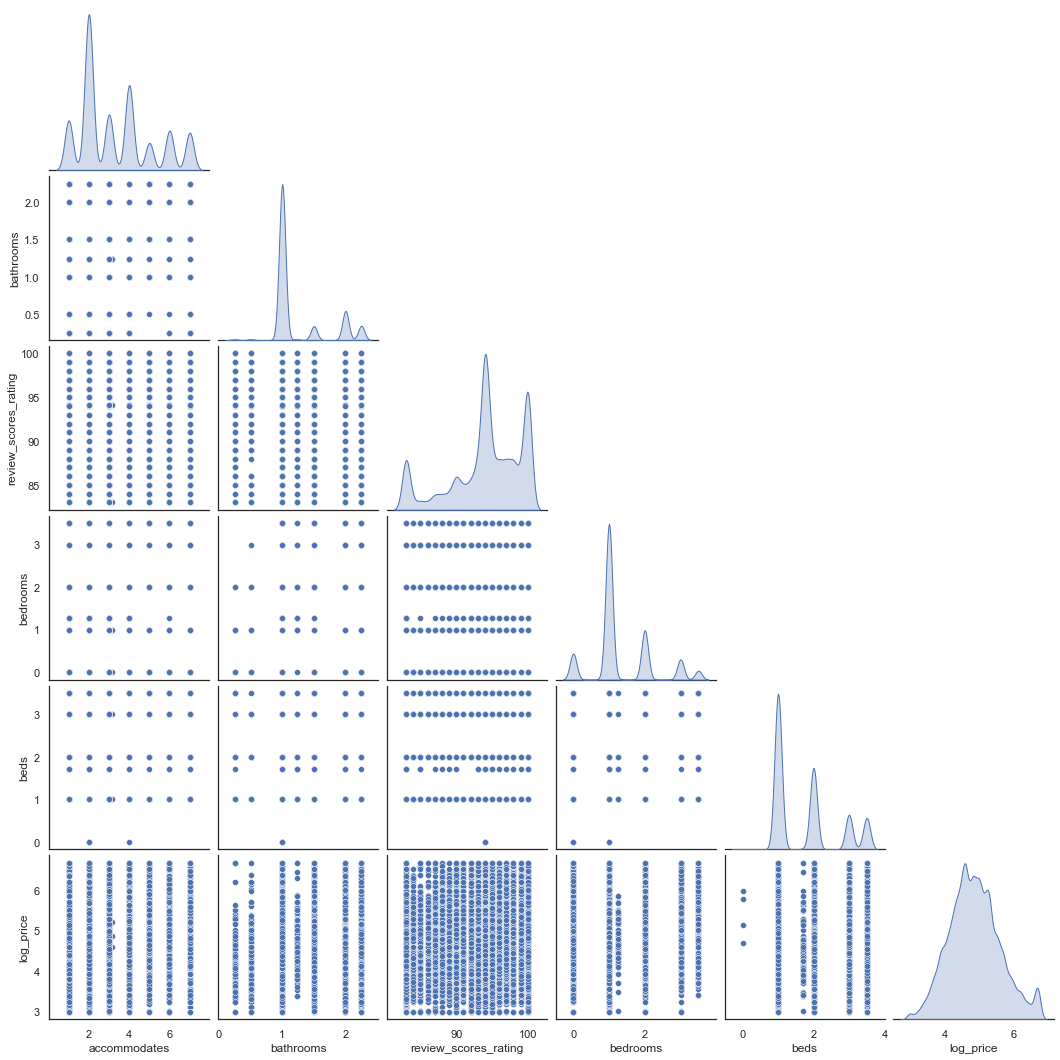

In [24]:
sns.pairplot(df[numcols], diag_kind='kde',corner=True);

# Train-Test Split

In [25]:
# Copy all the predictor variables into X dataframe
X = df.drop('log_price', axis=1)

# Copy target into the y dataframe. 
y = df['log_price']

In [26]:
X.head()

,accommodates,bathrooms,instant_bookable,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True
0,3.0,1.0,False,100.000000,1.0,1.0,0,0,0,1,1
1,7.0,1.0,True,93.000000,3.0,3.0,0,0,0,1,1
2,5.0,1.0,True,92.000000,1.0,3.0,0,0,1,0,1
3,4.0,1.0,False,94.067365,2.0,2.0,0,0,0,0,1
4,2.0,1.0,True,83.000000,0.0,1.0,0,0,1,0,1


In [27]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=1)

# Linear Regression Model

In [28]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [29]:
# get the values of the coefficients
regression_model.coef_

array([ 0.09505751,  0.18080417, -0.06503896,  0.01170187,  0.15805881,
       -0.04507899, -0.61155709, -1.08180489, -0.06001522, -0.00582287,
       -0.08187382])

In [30]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print(f"The coefficient for {col_name} is {regression_model.coef_[idx]}")

The coefficient for accommodates is 0.09505750537686584
The coefficient for bathrooms is 0.18080416863721488
The coefficient for instant_bookable is -0.06503896431474643
The coefficient for review_scores_rating is 0.011701869399644634
The coefficient for bedrooms is 0.15805881436414898
The coefficient for beds is -0.0450789948097009
The coefficient for room_type_Private room is -0.6115570888488913
The coefficient for room_type_Shared room is -1.0818048891941523
The coefficient for cancellation_policy_moderate is -0.060015221396403584
The coefficient for cancellation_policy_strict is -0.005822870628089213
The coefficient for cleaning_fee_True is -0.0818738176507201


In [31]:
# alternative better way of displaying the coefficients
pd.DataFrame(regression_model.coef_.reshape(11,-1), 
             columns=['Coefficient'],
            index = X_train.columns)

,Coefficient
accommodates,0.095058
bathrooms,0.180804
instant_bookable,-0.065039
review_scores_rating,0.011702
bedrooms,0.158059
beds,-0.045079
room_type_Private room,-0.611557
room_type_Shared room,-1.081805
cancellation_policy_moderate,-0.060015
cancellation_policy_strict,-0.005823


In [32]:
# Let us check the intercept for the model

intercept = regression_model.intercept_

print(f"The intercept for our model is {intercept}")

The intercept for our model is 3.4292638017758295


# Model Evaluation

## R-Squared

In [33]:
# R square on training data
regression_model.score(X_train, y_train)

0.5082917563299905

50% of the variation in the log_price is explained by the predictors in the model for train set

In [34]:
# R square on testing data
regression_model.score(X_test, y_test)

0.5019765734338828

## RMSE

In [35]:
#RMSE on Training data
predicted_train=regression_model.predict(X_train)
mean_squared_error(y_train,predicted_train, squared=False)

0.5159255811569989

In [36]:
# another way of calculating rmse
from statsmodels.tools.eval_measures import rmse

In [37]:
rmse(y_train,predicted_train)

0.5159255811569989

In [38]:
#RMSE on Testing data
predicted_test=regression_model.predict(X_test)
mean_squared_error(y_test,predicted_test,squared=False)

0.519786761438849

In [39]:
df.log_price.mean() # compare rmse with mean log price

4.860395771153429

In [40]:
0.519786761438849*100/4.860395771153429

10.694329966374273

## Linear Regression using statsmodels

In [41]:
# concatenate X and y into a single dataframe,Since statsmodels library requires that data be passed as a single dataframe unlike sklearn which wants X and y as separate variables
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,accommodates,bathrooms,instant_bookable,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,log_price
50743,3.0,1.0,False,94.067365,2.0,2.0,0,0,0,0,1,5.010635
12586,5.0,2.0,False,92.000000,2.0,2.0,0,0,0,1,1,5.703782
4152,4.0,1.0,False,100.000000,2.0,2.0,0,0,0,1,0,5.857933
10059,2.0,1.5,True,94.067365,1.0,1.0,1,0,0,1,0,5.129899
38268,4.0,1.0,False,84.000000,1.0,2.0,0,0,0,1,1,4.564348


In [42]:
data_train.rename(columns = {"room_type_Entire home/apt": "room_type_entire_home", 
                             "room_type_Private room": "room_type_private_room", 
                     "room_type_Shared room": "room_type_shared_room"}, 
                      inplace = True) 

data_test.rename(columns = {"room_type_Entire home/apt": "room_type_entire_home", 
                            "room_type_Private room": "room_type_private_room", 
                     "room_type_Shared room": "room_type_shared_room"}, 
                      inplace = True) 

In [43]:
data_train.columns

Index(['accommodates', 'bathrooms', 'instant_bookable', 'review_scores_rating',
       'bedrooms', 'beds', 'room_type_private_room', 'room_type_shared_room',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'cleaning_fee_True', 'log_price'],
      dtype='object')

In [44]:
# write the formula string (similar to Anova)
expr= 'log_price ~ accommodates + bathrooms + instant_bookable+review_scores_rating +bedrooms + beds + room_type_private_room + room_type_shared_room  + cancellation_policy_moderate + cancellation_policy_strict + cleaning_fee_True'

In [45]:
from statsmodels.formula.api import ols

In [46]:
lm1 = ols(formula= expr, data = data_train).fit()
lm1.params

Intercept                       3.429264
instant_bookable[T.True]       -0.065039
accommodates                    0.095058
bathrooms                       0.180804
review_scores_rating            0.011702
bedrooms                        0.158059
beds                           -0.045079
room_type_private_room         -0.611557
room_type_shared_room          -1.081805
cancellation_policy_moderate   -0.060015
cancellation_policy_strict     -0.005823
cleaning_fee_True              -0.081874
dtype: float64

In [47]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     3813.
Date:                Sat, 30 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:55:27   Log-Likelihood:                -30728.
No. Observations:               40584   AIC:                         6.148e+04
Df Residuals:                   40572   BIC:                         6.158e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        3.4293      0.050     67.981      0.000       3.330       3.528
instant_bookable[T.True]        -0.0650      0.006    -11.560      0.000      -0.076      -0.054
accommodates                     0.0951      0.003     33.288      0.000       0.089       0.101
bathrooms                        0.1808      0.007     25.690      0.000       0.167       0.195
review_scores_rating             0.0117      0.001     22.275      0.000       0.011       0.013
bedrooms                         0.1581      0.005     32.798      0.000       0.149       0.168
beds                            -0.0451      0.005     -8.599      0.000      -0.055      -0.035
room_type_private_room          -0.6116      0.007    -93.327      0.000      -0.624      -0.599
room_type_shared_room           -1.0818      0.015    -72.867      0.000      -1.111      -1.053
cancellation_policy_moderate    -0.0600      0.007     -8.318      0.000      -0.074      -0.046
cancellation_policy_strict      -0.0058      0.007     -0.887      0.375      -0.019       0.007
cleaning_fee_True               -0.0819      0.006    -12.945      0.000      -0.094      -0.069
==============================================================================
Omnibus:                     2618.685   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4228.792
Skew:                           0.519   Prob(JB):                         0.00
Kurtosis:                       4.192   Cond. No.                     1.86e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not 0. Here all regression co-efficients are not 0

In [48]:
# Calculate MSE
train_pred = lm1.predict(data_train.drop('log_price',axis=1))
mean_squared_error(data_train['log_price'],train_pred,squared=False)

#from statsmodels.tools.eval_measures import rmse
# rmse(y_true, y_pred)

0.5159255811569989

In [49]:
np.sqrt(lm1.mse_resid) #another way to calculate  rmse

0.51600187329511

In [50]:
# Prediction on Test data
test_pred = lm1.predict(data_test)

In [51]:
mean_squared_error(data_test['log_price'], test_pred, squared=False)

0.5197867614388496

 # Conclusion

The final Linear Regression equation is  
  
<b>log_price = b0 + b1 * instant_bookable[T.True] + b2 * accommodates + b3 * bathrooms + b4 * review_scores_rating + b5 * bedrooms + b6 * beds + b7 * room_type_private_room + b8 * room_type_shared_room + b9 * cancellation_policy_moderate + b10 * cancellation_policy_strict + b11 * cleaning_fee_True </b>
  
<b>log_price = (3.43) * Intercept + (-0.07) * instant_bookable[T.True] + (0.1) * accommodates + (0.18) * bathrooms + (0.01) * review_scores_rating + (0.16) * bedrooms + (-0.05) * beds + (-0.61) * room_type_private_room + (-1.08) * room_type_shared_room + (-0.06) * cancellation_policy_moderate + (-0.01) * cancellation_policy_strict + (-0.08) * cleaning_fee_True</b>  
  
When accommodates increases by 1 unit, log_price increases by 0.1 units, keeping all other predictors constant.  
similarly, when no. of bathrooms increases by 1 unit, log_price increases by 0.18 units, keeping all other predictors constant.
  
  
There are also some negative co-efficient values, for instance, room_type_shared_room has its corresponding co-efficient as -1.08. This implies, when the room type is shared room, the log_price decreases by 1.08 units, keeping all other predictors constant.

